/tmp/ipykernel_5249/1872738942.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


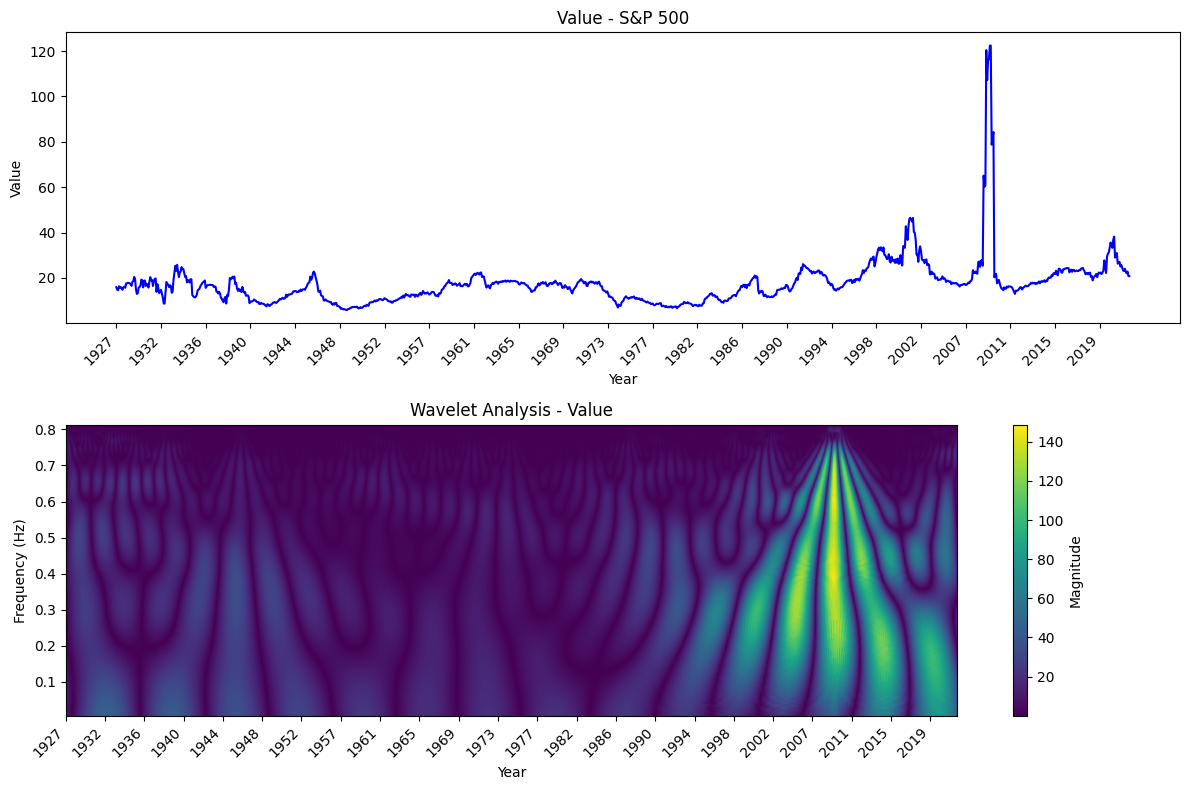

In [1]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read Excel data into a DataFrame
file_path = 'sp_500.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Step 2: Specify the wavelet function
wavelet = 'morl'  # Use the Morlet wavelet

# Step 3: Extract data for the entire dataset
pe_ratio_values = df['value'].tolist()
years = pd.to_datetime(df['date']).dt.year.tolist()

# Perform wavelet analysis
coeffs, freqs = pywt.cwt(pe_ratio_values, scales=np.arange(1, 128), wavelet=wavelet)

# Create common x-values for plotting
x_values = np.arange(len(pe_ratio_values))

# Plot the wavelet analysis results
plt.figure(figsize=(12, 8))

# Plot the original PE ratio with years on the x-axis
plt.subplot(2, 1, 1)
plt.plot(x_values, pe_ratio_values, color='blue')
plt.title('Value - S&P 500')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(x_values[::50], years[::50], rotation=45, ha='right')  # Show every 50th year for better visibility

# Plot the wavelet coefficients
plt.subplot(2, 1, 2)
plt.imshow(np.abs(coeffs), aspect='auto', extent=[0, len(pe_ratio_values), freqs[-1], freqs[0]], cmap='viridis', interpolation='bilinear')
plt.title('Wavelet Analysis - Value')
plt.xlabel('Year')
plt.ylabel('Frequency (Hz)')

# Adjust x-axis ticks and labels
plt.xticks(x_values[::50], years[::50], rotation=45, ha='right')

plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()
